#Importing the necessary libraries

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the train and test data

In [ ]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')


In [ ]:
#print(test_data.columns)

# Create the Bathroom column by summing relevant columns

In [ ]:
train_data['Bathroom'] = train_data['BsmtFullBath'] + train_data['BsmtHalfBath'] + train_data['FullBath'] + train_data['HalfBath']
test_data['Bathroom'] = test_data['BsmtFullBath'] + test_data['BsmtHalfBath'] + test_data['FullBath'] + test_data['HalfBath']


# Drop rows with NaN values in the training and testing data, but only for relevant columns

In [ ]:
train_data.dropna(subset=['LotArea', 'BedroomAbvGr', 'Bathroom', 'SalePrice'], inplace=True)
test_data.dropna(subset=['LotArea', 'BedroomAbvGr', 'Bathroom'], inplace=True)

# Plot the distribution of the target variable

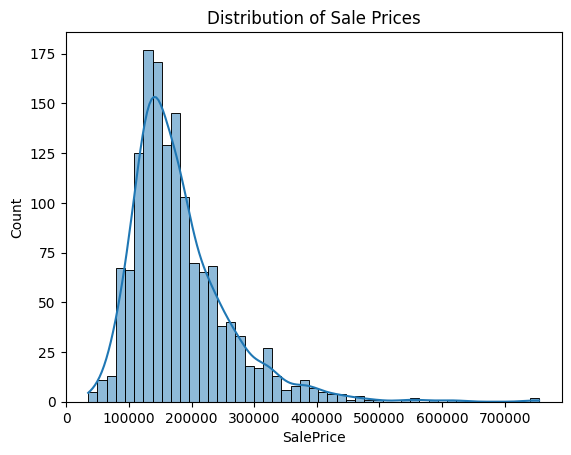

In [ ]:
sns.histplot(train_data['SalePrice'], kde=True)
plt.title('Distribution of Sale Prices')
plt.show()


# Plot relationships between features and target

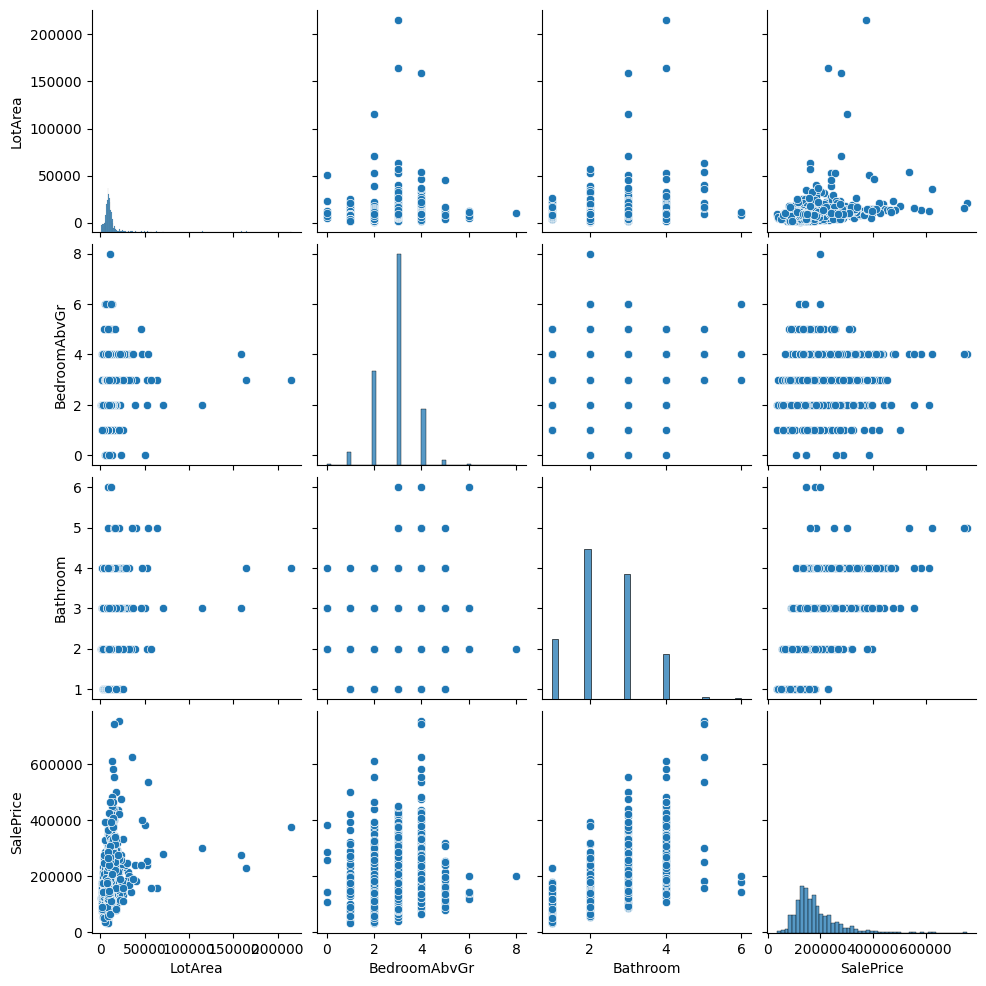

In [ ]:
sns.pairplot(train_data[['LotArea', 'BedroomAbvGr', 'Bathroom', 'SalePrice']])
plt.show()

# Select the necessary columns in training data

In [ ]:
train_data = train_data[['LotArea', 'BedroomAbvGr', 'Bathroom', 'SalePrice']]

# Preserve the Id column in the test data and select necessary columns

In [ ]:
if 'Id' in test_data.columns:
    test_ids = test_data['Id']
else:
    test_data['Id'] = test_data.index
    test_ids = test_data['Id']
test_data = test_data[['Id', 'LotArea', 'BedroomAbvGr', 'Bathroom']]


# Split the train data into features and target variable

In [ ]:
X_train = train_data[['LotArea', 'BedroomAbvGr', 'Bathroom']]
y_train = train_data['SalePrice']


# For the test data, we only have features

In [ ]:
X_test = test_data[['LotArea', 'BedroomAbvGr', 'Bathroom']]


# Train the Linear Regression model

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Evaluate the model

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_train_pred = model.predict(X_train)

mse = mean_squared_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 3788061870.667926
R^2 Score: 0.3993675514242522


# Predict the prices for the test set

In [ ]:
y_pred = model.predict(X_test)

# Save the predictions to a CSV file with the same Id as in the test data

In [ ]:
predictions = pd.DataFrame({'Id': test_ids, 'SalePrice': y_pred})
predictions.to_csv('predictions.csv', index=False)

print('Predictions saved to predictions.csv')

Predictions saved to predictions.csv
